# Model Transform for Delivery Time Prediction

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
dt = pd.read_csv("delivery_time.csv")

In [3]:
dt.head(20)

,Delivery_Time,Sorting _Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [4]:
dt.describe()

,Delivery_Time,Sorting _Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


In [5]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
Delivery_Time    21 non-null float64
Sorting _Time    21 non-null int64
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [6]:
dt.shape

(21, 2)

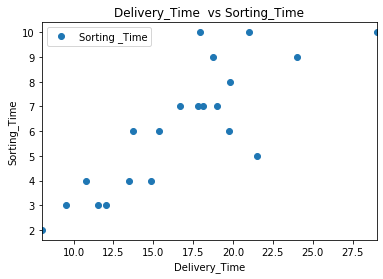

In [7]:
dt.plot(x='Delivery_Time', y='Sorting _Time', style='o') 


plt.title('Delivery_Time  vs Sorting_Time')  
plt.xlabel('Delivery_Time') 
plt.ylabel('Sorting_Time')
plt.show()

In [8]:
from scipy.stats import pearsonr
# calculate Pearson's correlation
corr, _ = pearsonr(dt['Delivery_Time'], dt['Sorting _Time'])
print('Pearsons correlation: %.3f' % corr)

from scipy.stats import spearmanr
# calculate spearman's correlation
corr, _ = spearmanr(dt['Delivery_Time'], dt['Sorting _Time'])
print('Spearmans correlation: %.3f' % corr)

Pearsons correlation: 0.826
Spearmans correlation: 0.806


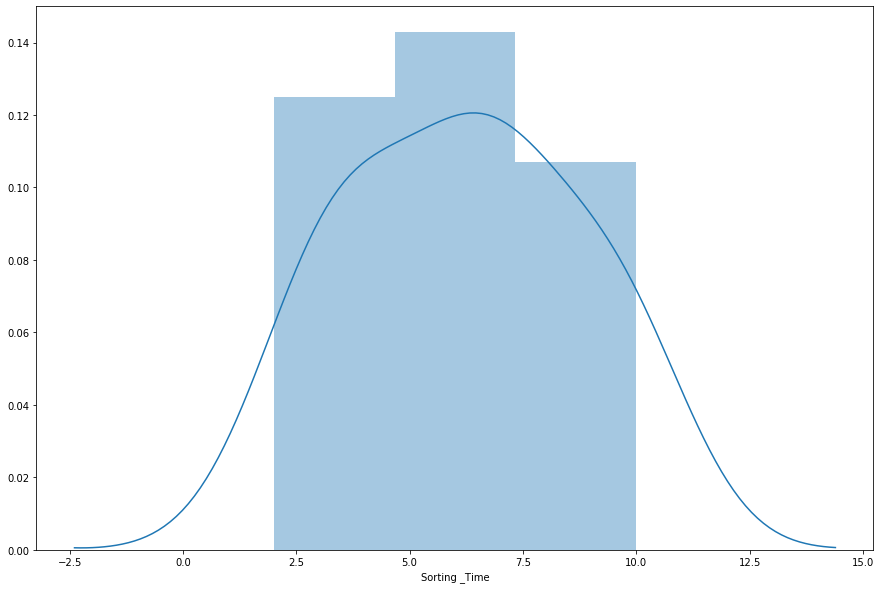

In [9]:
plt.figure(figsize=(15,10))
plt.tight_layout()
sns.distplot(dt['Sorting _Time'])
plt.show()

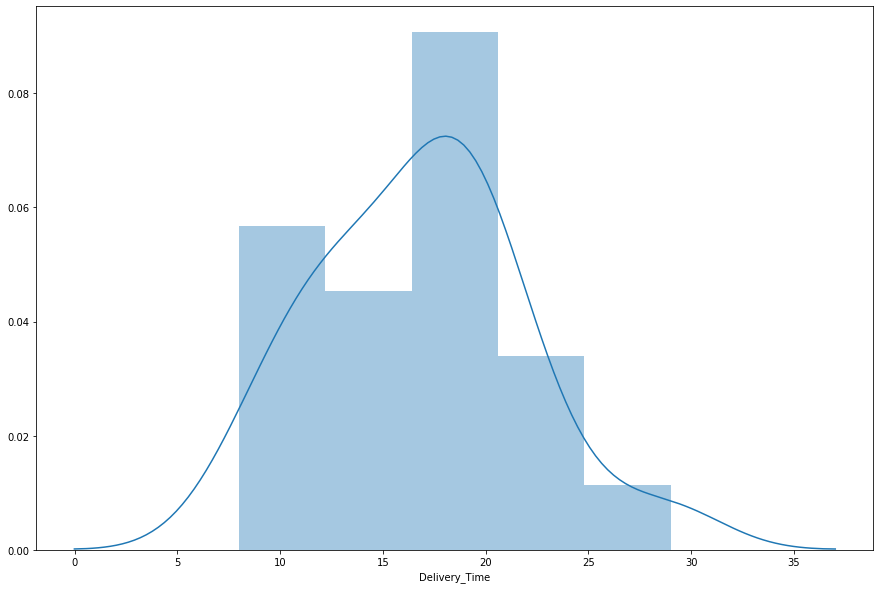

In [10]:
plt.figure(figsize=(15,10))
plt.tight_layout()
sns.distplot(dt['Delivery_Time'])
plt.show()

# Simple Linear Regression Model 

In [11]:
# Input dataset
X = dt['Sorting _Time'].values.reshape(-1,1)
# Output or Predicted Value of data
y = dt['Delivery_Time'].values.reshape(-1,1)

In [12]:
from sklearn.model_selection import train_test_split
from sklearn import metrics 
from sklearn.linear_model import LinearRegression 

In [13]:
X_train,X_test, Y_train, Y_test= train_test_split(X,y, test_size=.2, random_state=42)

In [14]:
slr_model= LinearRegression()
slr_model.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [15]:
print(" Intercept value of Model is ", slr_model.intercept_)
print(" Coefficient Value of Model is ", slr_model.coef_)

 Intercept value of Model is  [4.68229796]
 Coefficient Value of Model is  [[2.02424455]]


In [16]:
model_pred= slr_model.predict(X_test)
model_pred

array([[24.9247435 ],
       [18.85200984],
       [12.77927618],
       [12.77927618],
       [24.9247435 ]])

In [17]:
df_p= pd.DataFrame({ 'Actual': Y_test.flatten(), 'Predicted': model_pred.flatten()})
df_p

,Actual,Predicted
0,21.00,24.924743
1,18.11,18.852010
2,14.88,12.779276
3,13.50,12.779276
4,17.90,24.924743


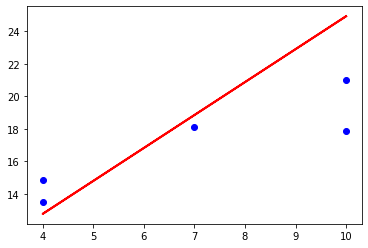

In [18]:
plt.scatter(X_test, Y_test,  color='blue')
plt.plot(X_test, model_pred, color='red', linewidth=2)
plt.show()

In [19]:
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, model_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, model_pred) ) 
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, model_pred)))
print("R^2 Score :          ", metrics.r2_score(Y_test, model_pred))

Mean Absolute Error: 2.902588896697121
Mean Squared Error: 14.04673895663505
Root Mean Squared Error: 3.7478979383962754
R^2 Score :           -1.020759958636741


# Logrithm Transformation Model 
y= a+ b* log(x)

In [20]:
# Input dataset
X = np.log(dt['Sorting _Time'].values.reshape(-1,1))

# Output or Predicted Value of data
y = dt['Delivery_Time'].values.reshape(-1,1)

In [21]:
X_train_log, X_test_log, Y_train_log,Y_test_log= train_test_split(X,y, test_size=0.2, random_state=42)

In [22]:
log_model=LinearRegression()
log_model.fit(X_train_log, Y_train_log)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [23]:
print(" Intercept value of Model is ", log_model.intercept_)
print(" Coefficient Value of Model is ", log_model.coef_)

 Intercept value of Model is  [-0.31865575]
 Coefficient Value of Model is  [[10.09551654]]


In [24]:
log_model_pred= log_model.predict(X_test)
log_model_pred

array([[100.63650966],
       [ 70.34996004],
       [ 40.06341041],
       [ 40.06341041],
       [100.63650966]])

In [25]:
df_l= pd.DataFrame({'Actual': Y_test_log.flatten(), 'Predicted': log_model_pred.flatten()})
df_l

,Actual,Predicted
0,21.00,100.63651
1,18.11,70.34996
2,14.88,40.06341
3,13.50,40.06341
4,17.90,100.63651


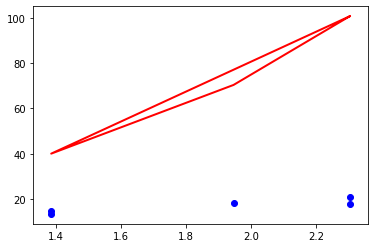

In [26]:
plt.scatter(X_test_log, Y_test_log,  color='blue')
plt.plot(X_test_log, log_model_pred, color='red', linewidth=2)
plt.show()

In [27]:
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test_log, log_model_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(Y_test_log, log_model_pred) ) 
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test_log, log_model_pred)))
print("R^2 Score :          ", metrics.r2_score(Y_test_log, log_model_pred))

Mean Absolute Error: 53.27196003597834
Mean Squared Error: 3451.2272117131165
Root Mean Squared Error: 58.74714641336306
R^2 Score :           -495.49258657954476


# Exponential Tranformation of Model

*** logY$_i$=α+βX$_i$+ε***

In [28]:
# Input dataset
X_ex = dt['Sorting _Time'].values.reshape(-1,1)

# Output or Predicted Value of data
y_ex = np.log(dt['Delivery_Time'].values.reshape(-1,1))

In [29]:
X_train_ex, X_test_ex,Y_train_ex,Y_test_ex= train_test_split(X_ex,y_ex, test_size=0.2,random_state=42)

In [30]:
exp_model= LinearRegression()
exp_model.fit(X_train_ex,Y_train_ex)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [31]:
print('Intercept Value of exponential Model is ', exp_model.intercept_)
print('Co effieient Value of  Exponential Model is ', exp_model.coef_)

Intercept Value of exponential Model is  [1.9917351]
Co effieient Value of  Exponential Model is  [[0.12920274]]


In [32]:
y_pred_exp= exp_model.predict(X_test_ex)
y_pred_exp

array([[3.28376247],
       [2.89615425],
       [2.50854604],
       [2.50854604],
       [3.28376247]])

In [33]:
exp_df= pd.DataFrame({"Actual": Y_test_ex.flatten(), "Predicted": y_pred_exp.flatten()})
exp_df

,Actual,Predicted
0,3.044522,3.283762
1,2.896464,2.896154
2,2.700018,2.508546
3,2.602690,2.508546
4,2.884801,3.283762


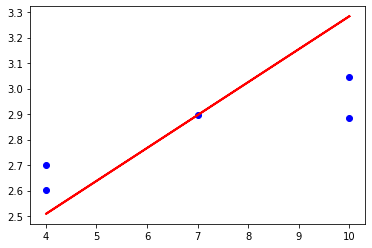

In [34]:
plt.scatter(X_test_ex, Y_test_ex,  color='blue')
plt.plot(X_test_ex, y_pred_exp, color='red', linewidth=2)
plt.show()

In [35]:
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test_ex, y_pred_exp))  
print('Mean Squared Error:', metrics.mean_squared_error(Y_test_ex, y_pred_exp) ) 
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test_ex, y_pred_exp)))
print("R^2 Score :          ", metrics.r2_score(Y_test_ex, y_pred_exp))

Mean Absolute Error: 0.18482548465812512
Mean Squared Error: 0.05238618256457228
Root Mean Squared Error: 0.2288802799818549
R^2 Score :           -1.1485016492474212


# Quadratic Transformation

In [36]:
dt['Sorting_Time_s'] = dt['Sorting _Time'] * dt['Sorting _Time'] 

#emp_data['Square_S_hike'] = emp_data.apply(lambda row: row.Salary_hike**2, axis =1 )

In [37]:
dt


,Delivery_Time,Sorting _Time,Sorting_Time_s
0,21.00,10,100
1,13.50,4,16
2,19.75,6,36
3,24.00,9,81
4,29.00,10,100
5,15.35,6,36
6,19.00,7,49
7,9.50,3,9
8,17.90,10,100
9,18.75,9,81


In [38]:
X = dt.iloc[:,dt.columns != 'Delivery_Time']
Y = dt.iloc[:,0]
X_train_q, X_test_q, Y_train_q, Y_test_q = train_test_split(X, Y, test_size=0.2, random_state= 42)
print(Y_test_q)


0     21.00
17    18.11
15    14.88
1     13.50
8     17.90
Name: Delivery_Time, dtype: float64


In [39]:
Quad_model= LinearRegression()
Quad_model.fit(X_train_q, Y_train_q)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [40]:
print('Intercept value of Quadratic Model', Quad_model.intercept_)

coeff_df = pd.DataFrame(Quad_model.coef_, X.columns, columns=['Coefficient'])
print(coeff_df)

#print('Coefficient value of Quadratic Model ', Quad_model.coef_)

Intercept value of Quadratic Model 6.242090334572486
                Coefficient
Sorting _Time      1.393609
Sorting_Time_s     0.053528


In [41]:
quad_pred = Quad_model.predict(X_test_q)
quad_pred

array([25.5309658 , 18.62021896, 12.67297286, 12.67297286, 25.5309658 ])

In [42]:
dt_q = pd.DataFrame({'Actual': Y_test_q, 'Predicted ': quad_pred})
dt_q

,Actual,Predicted
0,21.00,25.530966
17,18.11,18.620219
15,14.88,12.672973
1,13.50,12.672973
8,17.90,25.530966


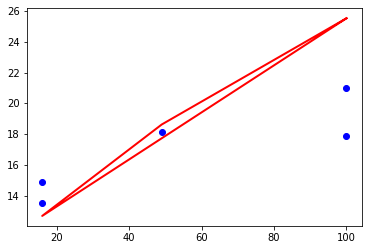

In [43]:
x_t =np.array(X_test_q)
plt.scatter(x_t[:,1], Y_test_q,  color='blue')
plt.plot(x_t[:,1], quad_pred, color='red', linewidth=2)
plt.show()

In [44]:
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test_q, quad_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(Y_test_q, quad_pred) ) 
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test_q, quad_pred)))
print("R^2 Score :          ", metrics.r2_score(Y_test_q, quad_pred))

Mean Absolute Error: 3.1412409665427523
Mean Squared Error: 16.915311232358516
Root Mean Squared Error: 4.112822781540498
R^2 Score :           -1.4334319682136933


# Cubic Transformation

In [45]:
dt['Sorting_Time_Q'] = dt['Sorting _Time'] * dt['Sorting _Time'] * dt['Sorting _Time']

In [46]:
dt

,Delivery_Time,Sorting _Time,Sorting_Time_s,Sorting_Time_Q
0,21.00,10,100,1000
1,13.50,4,16,64
2,19.75,6,36,216
3,24.00,9,81,729
4,29.00,10,100,1000
5,15.35,6,36,216
6,19.00,7,49,343
7,9.50,3,9,27
8,17.90,10,100,1000
9,18.75,9,81,729


In [47]:
X = dt.iloc[:,dt.columns != 'Delivery_Time']
Y = dt.iloc[:,0]
X_train_c, X_test_c, Y_train_c, Y_test_c = train_test_split(X, Y, test_size=0.2, random_state= 42)
print(Y_test_c)

0     21.00
17    18.11
15    14.88
1     13.50
8     17.90
Name: Delivery_Time, dtype: float64


In [48]:
cubic_recg = LinearRegression()
cubic_recg.fit(X_train_c, Y_train_c)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [49]:
print("Intercept value of Cubic Model is ", cubic_recg.intercept_)
coeff_df_cu = pd.DataFrame(cubic_recg.coef_, X.columns, columns=['Coefficient'])
print(coeff_df_cu)

Intercept value of Cubic Model is  -11.751882218002756
                Coefficient
Sorting _Time     12.808130
Sorting_Time_s    -2.026615
Sorting_Time_Q     0.114083


In [50]:
cubic_pred= cubic_recg.predict(X_test_c)

In [51]:
cu_df= pd.DataFrame({'Actual': Y_test_c, 'Predicted': cubic_pred})
cu_df

,Actual,Predicted
0,21.00,27.750616
17,18.11,17.731265
15,14.88,14.356095
1,13.50,14.356095
8,17.90,27.750616


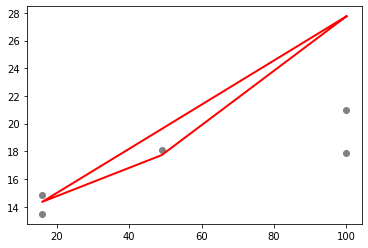

In [52]:
x_t_c =np.array(X_test_c)
plt.scatter(x_t_c[:,1], Y_test_c,  color='gray')
plt.plot(x_t_c[:,1], cubic_pred, color='red', linewidth=2)
plt.show()

In [53]:
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test_c, cubic_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(Y_test_c, cubic_pred) ) 
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test_c, cubic_pred)))
print("R^2 Score :          ", metrics.r2_score(Y_test_c, cubic_pred))

Mean Absolute Error: 3.6719932452434976
Mean Squared Error: 28.751250490364992
Root Mean Squared Error: 5.362019254941648
R^2 Score :           -3.1361468972284845


# Conclusion